In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets

In [2]:
pima_df = pd.read_csv('Datasets/Pima Indians Diabetes Database/diabetes.csv')
pima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
nhne_demographic = pd.read_csv('Datasets/National Health and Nutrition Examination Survey/demographic.csv')
nhne_diet = pd.read_csv('Datasets/National Health and Nutrition Examination Survey/diet.csv')
nhne_exam = pd.read_csv('Datasets/National Health and Nutrition Examination Survey/examination.csv')
nhne_lab = pd.read_csv('Datasets/National Health and Nutrition Examination Survey/labs.csv')
#nhne_med = pd.read_csv('Datasets/National Health and Nutrition Examination Survey/medications.csv')
nhne_quest = pd.read_csv('Datasets/National Health and Nutrition Examination Survey/questionnaire.csv')

In [4]:
hIn_012 = pd.read_csv('Datasets/Diabetes Health Indicators Dataset/diabetes_012_health_indicators_BRFSS2015.csv')
hIn_binary = pd.read_csv('Datasets/Diabetes Health Indicators Dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
hIn_5050_split = pd.read_csv('Datasets/Diabetes Health Indicators Dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

hIn_012

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
early_df = pd.read_csv("Datasets/Early Classification of Diabetes/diabetes_data.csv", delimiter=";")
early_df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


<h4>
<p style="text-align: center;">
<span style="color:green">
Task2: Data Quality Measures <br>
</span>
</p>
</h4>

### Diabetes Health Indicators Dataset

This dataset contains 3 files:

diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables

diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

In [6]:
hIn_5050_split

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [7]:
target = hIn_5050_split["Diabetes_binary"]
target

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70692, dtype: float64

In [8]:
hIn_5050_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
hIn_5050_split.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
hIn_5050_split.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [11]:
hIn_5050_split.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
hIn_5050_split.duplicated().sum()

1635

<AxesSubplot:>

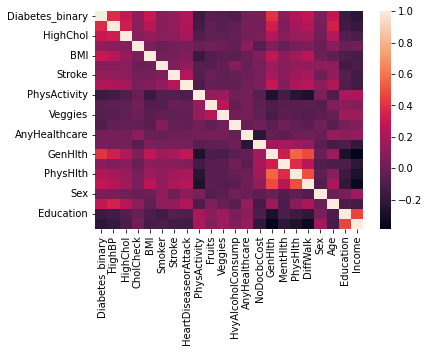

In [13]:
df_corr = hIn_5050_split.corr()
sns.heatmap(df_corr)

### Distributions

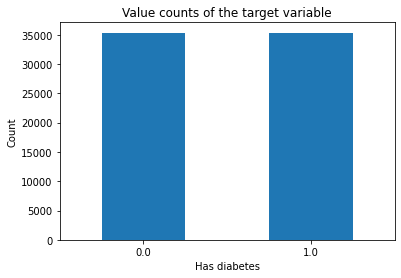

In [14]:
target.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Has diabetes")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

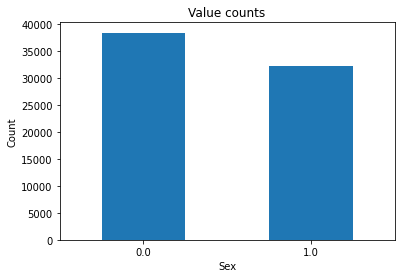

In [15]:
hIn_5050_split["Sex"].value_counts().plot(kind="bar") # Female = 0 , Male = 1
plt.title("Value counts")
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

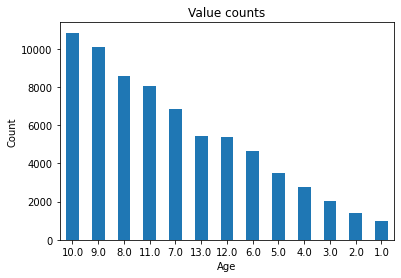

In [16]:
# 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
hIn_5050_split["Age"].value_counts().plot(kind="bar")
plt.title("Value counts")
plt.xlabel("Age")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

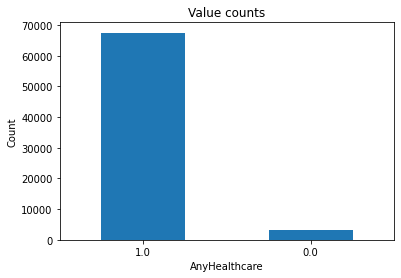

In [17]:
# Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
hIn_5050_split["AnyHealthcare"].value_counts().plot(kind="bar")
plt.title("Value counts")
plt.xlabel("AnyHealthcare")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

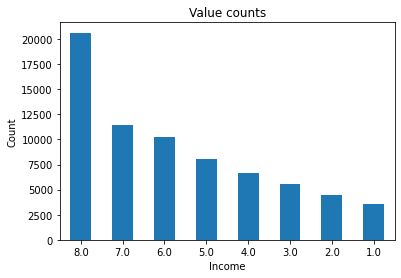

In [18]:
# Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
hIn_5050_split["Income"].value_counts().plot(kind="bar")
plt.title("Value counts")
plt.xlabel("Income")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

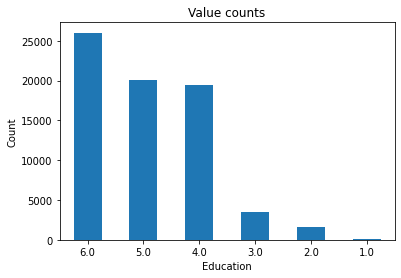

In [19]:
# Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8
hIn_5050_split["Education"].value_counts().plot(kind="bar")
plt.title("Value counts")
plt.xlabel("Education")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

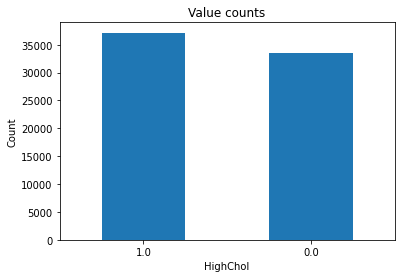

In [20]:
# 0 = no high cholesterol 1 = high cholesterol
hIn_5050_split["HighChol"].value_counts().plot(kind="bar")
plt.title("Value counts")
plt.xlabel("HighChol")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

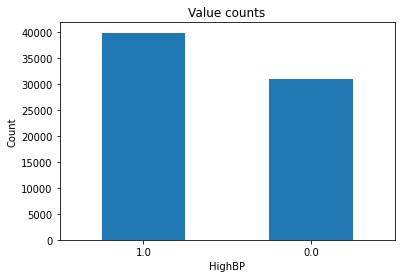

In [21]:
# 0 = no high BP 1 = high BP
hIn_5050_split["HighBP"].value_counts().plot(kind="bar")
plt.title("Value counts")
plt.xlabel("HighBP")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

### Relationship between variables

In [22]:
#sns.pairplot(hIn_5050_split)

## Feature Selection

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from warnings import simplefilter
simplefilter(action='ignore')

In [24]:
X, y = hIn_5050_split[list(set(hIn_5050_split.columns) - set(['Diabetes_binary']))], target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

### Random Forest Feature Selection

In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
importances = clf.feature_importances_

<BarContainer object of 21 artists>

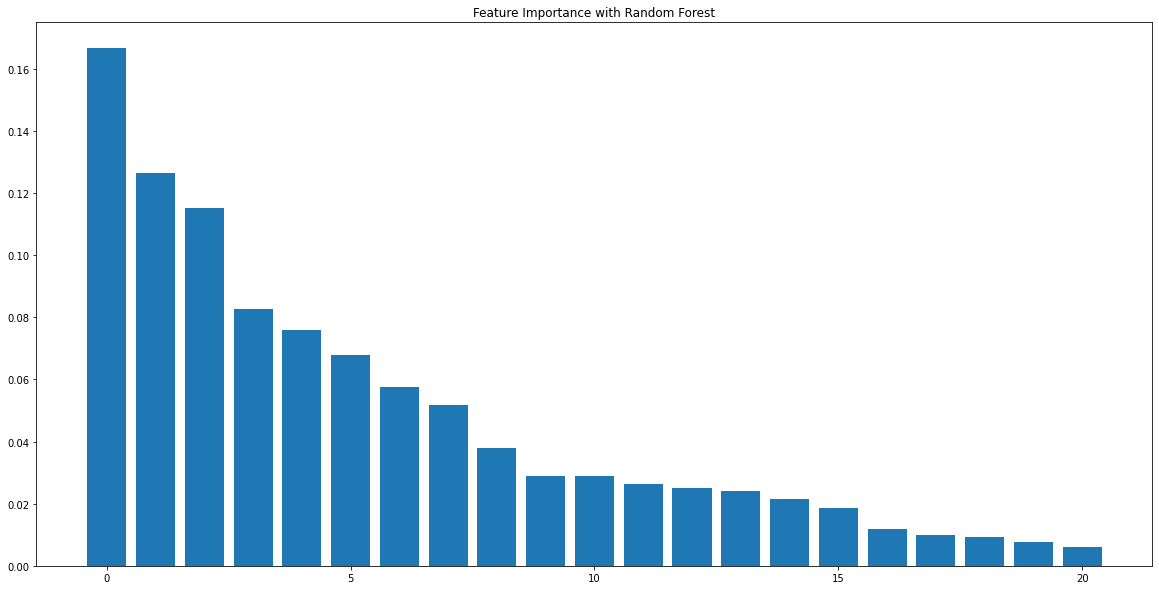

In [26]:
plt.figure(figsize = (20,10))
plt.title('Feature Importance with Random Forest')
plt.bar(range(len(importances)), sorted(importances, reverse = True))

In [27]:
index = -1
sum = 0
importatnt_features = []
for i,val in enumerate(sorted(enumerate(importances), key=lambda x: x[1], reverse = True)):
    sum += val[1]
    importatnt_features.append(val[0])
    if sum >= 0.8:
        index = i
        break
index

9

In [28]:
cols = X_train.columns.to_list()
print('Most important features:')
[cols[i] for i in importatnt_features]

Most important features:


['BMI',
 'Age',
 'GenHlth',
 'Income',
 'HighBP',
 'PhysHlth',
 'Education',
 'MentHlth',
 'HighChol',
 'Fruits']

### RFE Feature Selection

In [29]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X_train, y_train)
n_features = fit.n_features_
mask = fit.support_
selected_features = X_train.columns[mask]
print(len(selected_features))
print("Selected Features:\n", selected_features)

10
Selected Features:
 Index(['GenHlth', 'Stroke', 'HvyAlcoholConsump', 'Sex', 'CholCheck',
       'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Age', 'Veggies'],
      dtype='object')


## Simple Prototype Model

Best hyperparameters: {'max_depth': 7, 'n_estimators': 200}
Train Accuracy:  0.7382962733742983
Test Accuracy: 0.7363
Test Precision: 0.7137
Test Recall: 0.7868
Test F1 Score: 0.7484


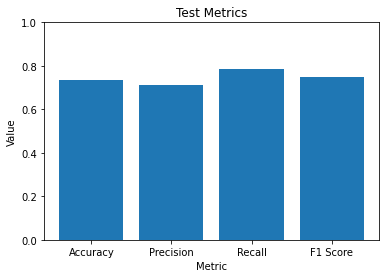

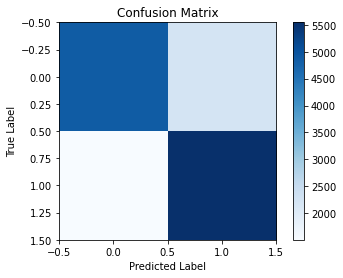

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, 7, None]}

# Perform hyperparameter optimization
clf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train[selected_features], y_train)

# Print the best hyperparameters
print("Best hyperparameters: {}".format(grid_search.best_params_))

# Train the Random Forest classifier with the best hyperparameters
clf = grid_search.best_estimator_
clf.fit(X_train[selected_features], y_train)
print('Train Accuracy: ', clf.score(X_train[selected_features], y_train))

# Test the model on the test data
y_pred_test = clf.predict(X_test[selected_features])

# Evaluate the performance on the test data
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print("Test Accuracy: {:.4f}".format(test_acc))
print("Test Precision: {:.4f}".format(test_prec))
print("Test Recall: {:.4f}".format(test_recall))
print("Test F1 Score: {:.4f}".format(test_f1))

# Plot the loss and metrics
metrics = [test_acc, test_prec, test_recall, test_f1]
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.bar(metric_labels, metrics)
plt.ylim([0, 1])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Metrics')
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## PoC GUI

In [31]:
# !pip install pysimplegui
import PySimpleGUI as sg
import os.path

layout = [
    [
        sg.Text('Diabetes Check Application', font=('Helvetica', 20, 'bold italic'), pad=5
                , justification="center", expand_x='true', text_color='blue'),
    ],
    [
        sg.Text("Please fill all empty fields, then use the green button to see the result."
                , font=('Helvetica', 13, 'bold italic'), pad=5),
    ],
    [
        sg.Text("Age:", size=(25, 1), key='-Age Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-Age-"),
        sg.Text('13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older'),
    ],
    [
        sg.Text("General Health:", size=(25, 1), key='-General Health Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-General Health-"),
        sg.Text('Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor'),
    ],
    [
        sg.Text("Stroke:", size=(25, 1), key='-Stroke Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-Stroke-"),
        sg.Text('you had a stroke. 0 = no 1 = yes'),
    ],
    [
        sg.Text("Heart Diseaseor Attack:", size=(25, 1), key='-Heart Diseaseor Attack Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-Heart Diseaseor Attack-"),
        sg.Text('coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes'),
    ],
    [
        sg.Text("High Chol:", size=(25, 1), key='-High Chol Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-High Chol-"),
        sg.Text('0 = no high cholesterol 1 = high cholesterol'),
    ],
    [
        sg.Text("Chol Check:", size=(25, 1), key='-Chol Check Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-Chol Check-"),
        sg.Text('0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years'),
    ],
    [
        sg.Text("Heavy Alcohol Consumption:", size=(25, 1), key='-Heavy Alcohol Consumption Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-Heavy Alcohol Consumption-"),
        sg.Text('(adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes'),
    ],
    [
        sg.Text("Veggies:", size=(25, 1), key='-Veggies Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-Veggies-"),
        sg.Text('Consume Vegetables 1 or more times per day 0 = no 1 = yes'),
    ],
    [
        sg.Text("Sex:", size=(25, 1), key='-Sex Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-Sex-"),
        sg.Text('0 = female 1 = male'),
    ],
    [
        sg.Text("High Blood Pressure:", size=(25, 1), key='-High Blood Pressure Label-'),
        sg.In(size=(25, 1), enable_events=True, key="-High Blood Pressure-"),
        sg.Text('0 = no high BP 1 = high BP'),
    ],
    [
        sg.Button("Show result", border_width=2, button_color='green', pad=10),
        sg.Text(key="-Error-", text='', text_color='yellow', font=('Helvetica', 12, 'bold italic')),
    ],
    [
        sg.HSeparator(),
    ],
    [
        sg.Text('Prone to Diabetes:', size=(15, 1), font=('Helvetica', 15, 'bold italic')),
        sg.Text(size=(25, 1), key="-Result-", text='-', font=('Helvetica', 15, 'bold italic')),
    ],
]

font = ('Helvetica', 10, 'bold italic')
sg.set_options(font=font)
window = sg.Window("Diabetes Detector!", layout)
information_labels_keys = [
    "-Age Label-",
    "-General Health Label-",
    "-Stroke Label-",
    "-Heart Diseaseor Attack Label-",
    "-High Chol Label-",
    "-Chol Check Label-",
    "-Heavy Alcohol Consumption Label-",
    "-Veggies Label-",
    "-Sex Label-",
    "-High Blood Pressure Label-",
]
information_keys = [
    "-Age-",
    "-General Health-",
    "-Stroke-",
    "-Heart Diseaseor Attack-",
    "-High Chol-",
    "-Chol Check-",
    "-Heavy Alcohol Consumption-",
    "-Veggies-",
    "-Sex-",
    "-High Blood Pressure-",
]
empty_error = 'Please fill all above fields!'
type_error = 'Please enter the information in correct format!'
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED:
        break
    if event == "Show result":
        window['-Result-'].update('-')
        window['-Error-'].update('')
        is_ready = True
        errors = set([])
        for i in range(len(information_keys)):
            window[information_labels_keys[i]].update(text_color='white')
            if values[information_keys[i]] == '':
                is_ready = False
                errors.add(empty_error)
                window[information_labels_keys[i]].update(text_color='yellow')
            elif not values[information_keys[i]].replace(".", "").isnumeric():
                is_ready = False
                errors.add(type_error)
                window[information_labels_keys[i]].update(text_color='yellow')
        if is_ready:
            input_data = []
            for key in information_keys:
                input_data.append(values[key])
            input_df = pd.DataFrame([input_data], columns=selected_features)
            result = int(clf.predict(input_df)[0])
            if result == 1:
                window['-Result-'].update('POSITIVE')
                window['-Result-'].update(text_color='red')
            else:
                window['-Result-'].update('NEGATIVE')
                window['-Result-'].update(text_color='green')
        else:
            error = ''
            for s in errors:
                error += ' ' + s
            window['-Error-'].update(error)
                
window.close()